In [63]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [64]:
IMAGE_SIZE = [224, 224]
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


In [65]:
for layer in vgg.layers:
  layer.trainable = False

In [66]:
x = Flatten()(vgg.output)
x = Dense(512, activation='relu', name='fc')(x)
prediction = Dense(46, activation='softmax', name='prediction')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [67]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [68]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    vertical_flip=False,
    #validation_split=0.2
                                  )
test_datagen = ImageDataGenerator(rescale = 1./255)


In [69]:
training_set = train_datagen.flow_from_directory('charAndDig_dataset/train',
                                                 target_size=(224,224),
                                                 batch_size=32,
                                                 class_mode='categorical')
test_set = test_datagen.flow_from_directory('charAndDig_dataset/test', 
                                            target_size=(224,224),
                                            batch_size=32,
                                            class_mode='categorical')


Found 2127 images belonging to 46 classes.
Found 532 images belonging to 46 classes.


In [70]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
67/67 [==============================] - 20s 294ms/step - loss: 4.3734 - accuracy: 0.1622 - val_loss: 2.4879 - val_accuracy: 0.3553
Epoch 2/20
67/67 [==============================] - 19s 291ms/step - loss: 1.8161 - accuracy: 0.5703 - val_loss: 1.3653 - val_accuracy: 0.6711
Epoch 3/20
67/67 [==============================] - 19s 287ms/step - loss: 0.9556 - accuracy: 0.7786 - val_loss: 1.0082 - val_accuracy: 0.7199
Epoch 4/20
67/67 [==============================] - 19s 288ms/step - loss: 0.6027 - accuracy: 0.8594 - val_loss: 0.7829 - val_accuracy: 0.7838
Epoch 5/20
67/67 [==============================] - 19s 288ms/step - loss: 0.3812 - accuracy: 0.9191 - val_loss: 0.7559 - val_accuracy: 0.7763
Epoch 6/20
67/67 [==============================] - 19s 288ms/step - loss: 0.2795 - accuracy: 0.9431 - val_loss: 0.6294 - val_accuracy: 0.8045
Epoch 7/20
67/67 [==============================] - 19s 289ms/step - loss: 0.2114 - accuracy: 0.9643 - val_loss: 0.5667 - val_accuracy: 0.8402

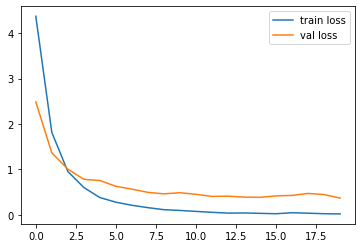

<Figure size 432x288 with 0 Axes>

In [72]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

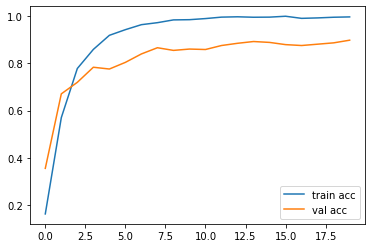

<Figure size 432x288 with 0 Axes>

In [73]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [75]:
model.save('vgg19_acc_89.85.h5')